<a href="https://colab.research.google.com/github/bertinmariana3-coder/Dashboard-dados-salarial-11.08.2025/blob/main/Aula0Phyton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1- Analise de dados com Panda




In [82]:
import pandas as pd

In [83]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")



In [84]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [86]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [87]:
df.shape

(133349, 11)

In [88]:
linhas, colunas = df. shape [0], df. shape [1]
print (' linhas', linhas)
print ('colunas', colunas)

 linhas 133349
colunas 11


In [89]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [128]:
df = df.rename(columns={
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'localizacao',
    'company_size': 'tamanho_empresa'
})

In [129]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [116]:
df['senioridade'].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [117]:
df['remoto'].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [94]:
df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [118]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [119]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,localizacao,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,95,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,77241,132563,17314,126140,119579,119641,129561


# Aula 2- Preparação e limpeza de dados

In [97]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [98]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [99]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
localizacao,0


In [120]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [101]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho_empresa
5588,NaN,SE,FT,Product Manager,184500,USD,184500,US,0,US,M
59692,NaN,MI,FT,Engineer,110000,USD,110000,DE,0,DE,M
59710,NaN,EN,FT,Data Scientist,208800,USD,208800,US,0,US,M
59759,NaN,SE,FT,Software Engineer,135000,USD,135000,US,0,US,M
59789,NaN,SE,FT,Engineer,112000,USD,112000,US,0,US,M
131000,NaN,SE,FT,Machine Learning Engineer,163800,USD,163800,US,0,US,M
131006,NaN,SE,FT,Data Analytics Manager,204500,USD,204500,US,0,US,M
133054,NaN,EN,FT,Data Scientist,40000,USD,40000,JP,100,MY,L
133281,NaN,MI,FT,Machine Learning Engineer,180000,PLN,46597,PL,100,PL,L
133317,NaN,MI,FT,Data Scientist,130000,USD,130000,US,50,US,L


In [102]:
import numpy as np
#criação de Dataframe de teste para a aula2
df_salarios = pd.DataFrame({'nome':['Ana','bruno','Carlos','Diana','Eduardo','Mariana'],
                            'salario':[4000, np.nan,3500,np.nan,5000,100000]})
#aqui calcula a média salarial e substirui os nulos pela média e arredonda os valores
df_salarios ['salario_media']= df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
#calcula  a mediana e substituem as nulas pelas mediana
df_salarios ['salario_mediana']= df_salarios['salario'].fillna(df_salarios['salario'].median())
df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.0,4000.0
1,bruno,NaN,28125.0,4500.0
2,Carlos,3500.0,3500.0,3500.0
3,Diana,NaN,28125.0,4500.0
4,Eduardo,5000.0,5000.0,5000.0
5,Mariana,100000.0,100000.0,100000.0


In [103]:
df_temperaturas= pd.DataFrame ({'dia': ['seg','ter','qua','qui','sex'],
'temperatura':[30, np.nan, np.nan, 23, 27]})

df_temperaturas ['preenchido.ffill'] = df_temperaturas ['temperatura'].ffill()
df_temperaturas

,dia,temperatura,preenchido.ffill
0,seg,30.0,30.0
1,ter,NaN,30.0
2,qua,NaN,30.0
3,qui,23.0,23.0
4,sex,27.0,27.0


In [104]:
df_temperaturas= pd.DataFrame ({'dia': ['seg','ter','qua','qui','sex'],
'temperatura':[30, np.nan, np.nan, 23, 27]})

df_temperaturas ['preenchido.ffill'] = df_temperaturas ['temperatura'].bfill()
df_temperaturas

,dia,temperatura,preenchido.ffill
0,seg,30.0,30.0
1,ter,NaN,23.0
2,qua,NaN,23.0
3,qui,23.0,23.0
4,sex,27.0,27.0


In [105]:
df_cidades=pd.DataFrame ({'nome': ['Ana','Carlos','Diana','Eduardo','Mariana'],
'cidade': ['São paulo',np.nan,'curitiba', np.nan, 'belém']})
df_cidades ['cidade_corrigida'] = df_cidades ['cidade']. fillna('não imformado')
df_cidades


,nome,cidade,cidade_corrigida
0,Ana,São paulo,São paulo
1,Carlos,NaN,não imformado
2,Diana,curitiba,curitiba
3,Eduardo,NaN,não imformado
4,Mariana,belém,belém


In [121]:
df_limpo = df.dropna()

In [126]:
df = pd. read_csv ('https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv')
df_limpo = df.dropna()

In [131]:
df_limpo.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [146]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [147]:
df_limpo.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [148]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           133339 non-null  int64 
 1   experience_level    133339 non-null  object
 2   employment_type     133339 non-null  object
 3   job_title           133339 non-null  object
 4   salary              133339 non-null  int64 
 5   salary_currency     133339 non-null  object
 6   salary_in_usd       133339 non-null  int64 
 7   employee_residence  133339 non-null  object
 8   remote_ratio        133339 non-null  int64 
 9   company_location    133339 non-null  object
 10  company_size        133339 non-null  object
dtypes: int64(4), object(7)
memory usage: 12.2+ MB


In [139]:
df_limpo = df_limpo.assign (work_year=df_limpo['work_year'].astype('int64'))

In [137]:
df_limpo.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


# Aula 3- Visualização de dados

In [140]:
df_limpo.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


<Axes: title={'center': 'distribuição de senioridade'}, xlabel='experience_level'>

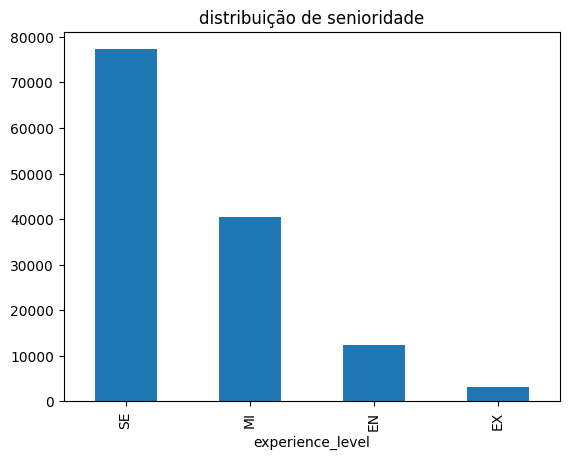

In [149]:
df_limpo['experience_level'].value_counts().plot(kind='bar', title= "distribuição de senioridade")

In [150]:
import seaborn as sns

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

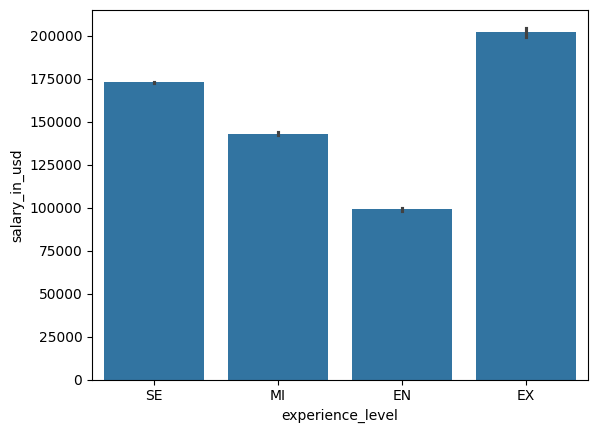

In [154]:
sns.barplot(data=df_limpo,x='experience_level', y= 'salary_in_usd')

In [155]:
import matplotlib.pyplot as plt

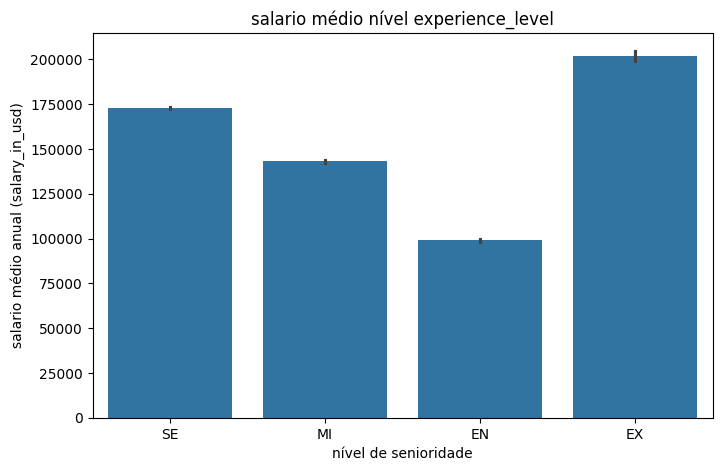

In [157]:
plt.figure(figsize=(8,5))

sns.barplot(data=df_limpo,x='experience_level', y= 'salary_in_usd')
plt.title('salario médio nível experience_level')
plt.xlabel('nível de senioridade')
plt.ylabel('salario médio anual (salary_in_usd)')
plt.show()



In [159]:
df_limpo.groupby('experience_level') ['salary_in_usd']. mean(). sort_values (ascending=False)

,salary_in_usd
experience_level,
EX,202027.667813
SE,172850.838301
MI,143044.845979
EN,99034.963267


In [160]:
ordem=df_limpo.groupby('experience_level') ['salary_in_usd']. mean(). sort_values (ascending=True).index

In [161]:
ordem

Index(['EN', 'MI', 'SE', 'EX'], dtype='object', name='experience_level')

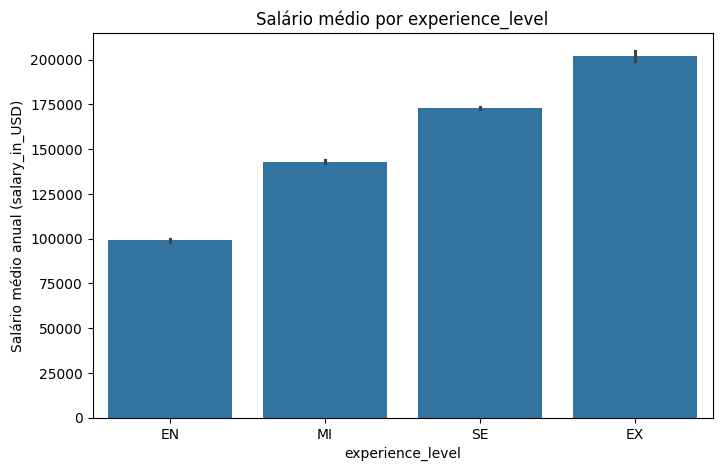

In [166]:

plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='experience_level', y='salary_in_usd', order=ordem)
plt.title("Salário médio por experience_level")
plt.xlabel("experience_level")
plt.ylabel("Salário médio anual (salary_in_USD)")
plt.show()


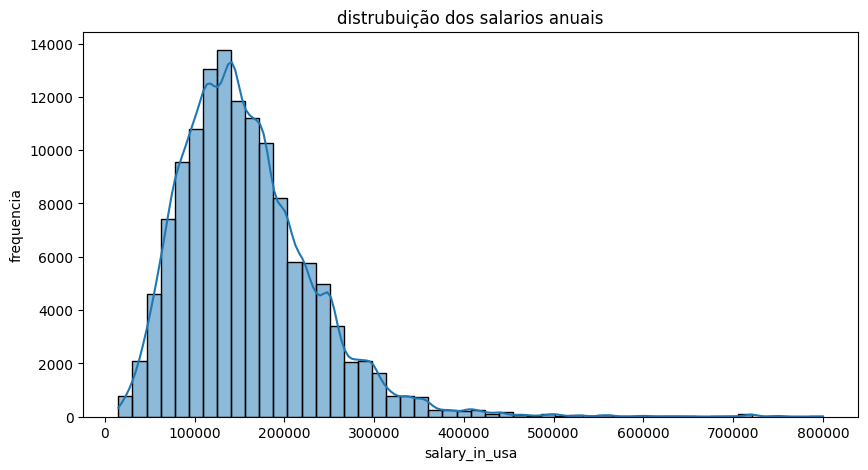

In [168]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_limpo ['salary_in_usd'], bins= 50, kde=True)
plt.title('distrubuição dos salarios anuais')
plt.xlabel('salary_in_usa')
plt.ylabel('frequencia')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

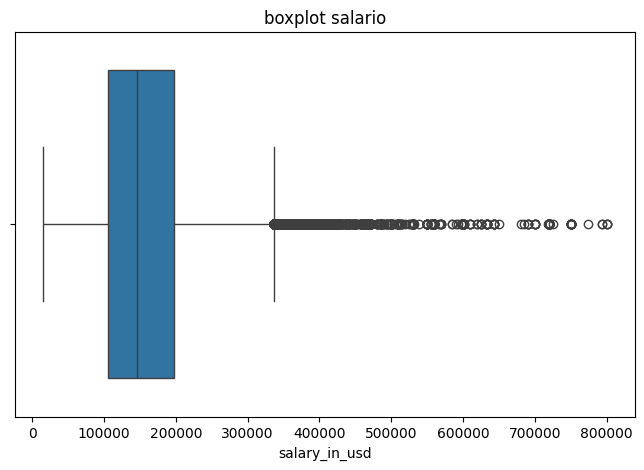

In [169]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo ['salary_in_usd'])
plt.title('boxplot salario')
plt.xlabel('salary_in_usd')
plt.show

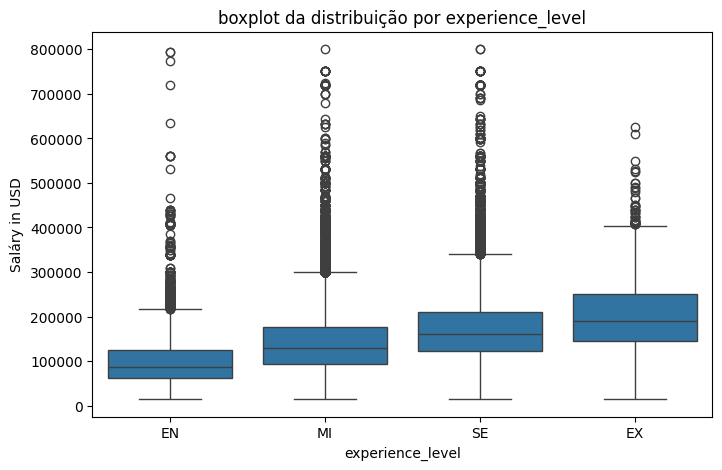

In [170]:
ordem_experience_level = ['SE','MI','EN','EX']

plt.figure(figsize=(8,5))
sns.boxplot(x='experience_level', y= 'salary_in_usd' , data = df_limpo, order=ordem)
plt.title('boxplot da distribuição por experience_level')
plt.xlabel('experience_level')
plt.ylabel('Saláry in USD')
plt.show()

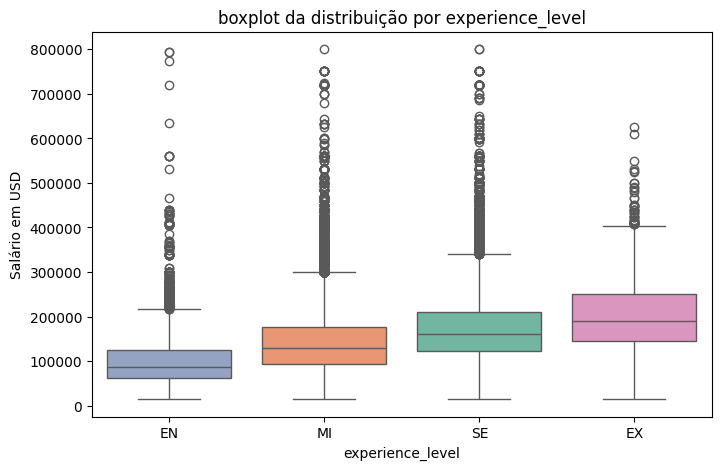

In [173]:
ordem_experience_level = ['SE','MI','EN','EX']

plt.figure(figsize=(8,5))
sns.boxplot(x='experience_level', y= 'salary_in_usd' , data = df_limpo, order=ordem, palette='Set2', hue='experience_level')
plt.title('boxplot da distribuição por experience_level')
plt.xlabel('experience_level')
plt.ylabel('Salário em USD')
plt.show()

In [174]:
import plotly.express as px

In [175]:
# Calcular a média salarial por experience_level
media_salario_experience_level = df_limpo.groupby('experience_level')['salary_in_usd'].mean().reset_index()

# Criar o gráfico de barras com Plotly Express
fig = px.bar(media_salario_experience_level,
             x='experience_level',
             y='salary_in_usd',
             title='Média Salarial por experience_level',
             labels={'experience_level': 'experience_level', 'salary_in_usd': 'Média Salarial (salary_in_USD)'})

# Exibir o gráfico
fig.show()

In [176]:
remote_ratio_contagem=df_limpo['remote_ratio'].value_counts(). reset_index()
remote_ratio_contagem.columns=['tipo_trabalho','quantidade']
fig = px.pie(remote_ratio_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title= 'proporção tipo de trabalho')


fig.show()

In [184]:
remote_ratio_contagem = df_limpo['remote_ratio'].value_counts().reset_index()
remote_ratio_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remote_ratio_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
          )

fig.show()


In [186]:
remote_ratio_contagem = df_limpo['remote_ratio'].value_counts().reset_index()
remote_ratio_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remote_ratio_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
          )
fig.update_traces(textinfo='percent+label')
fig.show()



In [217]:
df_limpo.to_csv('portifólio de dados.csv', index=False)

# Aula 4 - Construindo um dasbord interativo

In [218]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [219]:
pip install pyCountry

In [220]:
import pycountry

In [221]:
#Função para converter ISO2 para ISO3

def iso2_to_iso3(code):
 try:
  return pycountry.countries.get(alpha_2=code).alpha_3
 except:
    return None

#Criar nova coluna com ISO-3

df_limpo['residencia_iso3'] =df_limpo['employee_residence'] .apply (iso2_to_iso3)

#coletar média salarial por pais iso-3

df_ds = df_limpo[df_limpo['job_title'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['salary_in_usd'].mean().reset_index()

fig = px.choropleth(media_ds_pais,
            locations='residencia_iso3',
            color='salary_in_usd',
            color_continuous_scale='rdylgn',
            title='Salário médio de Cientista de Dados por país',
            labels={'salary_in_usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})


fig.show()

In [222]:
df_limpo.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,residencia_iso3
0,2025,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M,USA
1,2025,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M,USA
2,2025,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M,AUS
3,2025,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M,AUS
4,2025,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M,USA
